In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input
from keras.models import Model
from keras.layers import Concatenate
from tensorflow.keras import layers, optimizers, datasets

import os
import cv2
from sklearn import preprocessing
from pathlib import Path

In [18]:
# Membaca Data Train Gambar
train_path = []
label_train = []

path_train = "dataset/Test/"

for filename in os.listdir(path_train):
    
    train_path.append(path_train+filename)
    whole_label = filename.split('_')[0]
    useful_label = whole_label.split('.')[0]
    label_train.append(useful_label)

print("Jumlah Gambar Data Train: ", len(train_path))
print("6 Label Pertama: ", label_train[:6])

Jumlah Gambar Data Train:  1127
6 Label Pertama:  ['1', '10', '1003', '1015', '1022', '1024']


In [19]:
# Membaca Data Test Gambar 
test_path = []
label_test = []

path_test = "dataset/Train/"

for filename in os.listdir(path_test):
    
    test_path.append(path_test+filename)
    whole_label = filename.split('_')[0]
    useful_label = whole_label.split('.')[0]
    label_test.append(useful_label)

print("Jumlah Gambar Data Test: ", len(test_path))
print("6 Label Pertama: ", label_test[:6])

Jumlah Gambar Data Test:  1000
6 Label Pertama:  ['1003', '1015', '1022', '1024', '1025', '1033']


In [20]:
train_path[0]

'dataset/Test/1.png'

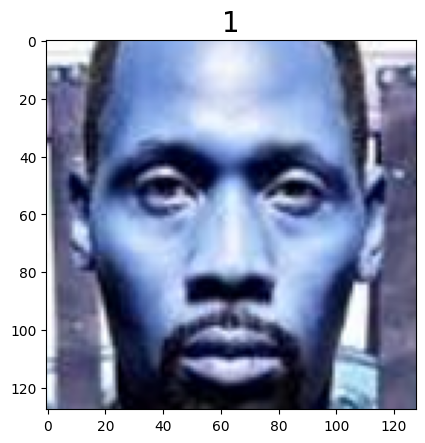

In [21]:
# cek Path Data Train
image = cv2.imread(train_path[0]) 

# the first image bleongs to clean directory under train
plt.imshow(image)
plt.title(label_train[0], fontsize = 20)
plt.axis('on')
plt.show()

In [22]:
test_path[50]


'dataset/Train/1156.png'

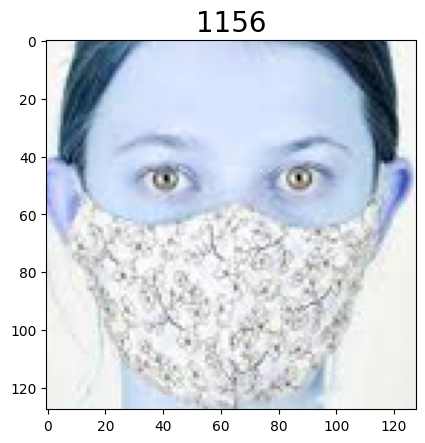

In [23]:
# cek Path Data Test
image = cv2.imread(test_path[50]) 

# the first image bleongs to clean directory under train
plt.imshow(image)
plt.title(label_test[50], fontsize = 20)
plt.axis('on')
plt.show()

In [24]:
X_train = []
X_test = []

# membaca data gambar train data
for path in train_path:
    
    image = cv2.imread(path)        
    image =  cv2.resize(image, (50,50))    
    X_train.append(image)
    
# membaca data gambar test data
for path in test_path:
    
    image = cv2.imread(path)        
    image =  cv2.resize(image, (50,50))    
    X_test.append(image)

X_test = np.array(X_test)
X_train = np.array(X_train)

In [25]:
# Display Dimensi
print("Bentuk X_train: ", X_train.shape)
print("Bentuk X_test: ", X_test.shape)

Bentuk X_train:  (1127, 50, 50, 3)
Bentuk X_test:  (1000, 50, 50, 3)


In [26]:
# Normalisasi Pixel Gambar agar mendapatkan range 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [27]:
# Encoding Label dan menkonversi ke nilai kategorikal
lable_encoder = preprocessing.LabelEncoder()
y_train_temp = lable_encoder.fit_transform(label_train)
y_test_temp = lable_encoder.fit_transform(label_test)

print("Nilai Encoding train: ", y_train_temp)
print("Nilai Encoding test: ", y_test_temp)

Nilai Encoding train:  [   0    1    2 ... 1124 1125 1126]
Nilai Encoding test:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 22

In [28]:
# Encoding data menggunakan keras utils
y_train = keras.utils.to_categorical(y_train_temp, 0)
y_test = keras.utils.to_categorical(y_test_temp, 0)

print("Nilai Categorical y_train:", y_train)
print("Nilia Ctegorical  y_test:", y_test)

Nilai Categorical y_train: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Nilia Ctegorical  y_test: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


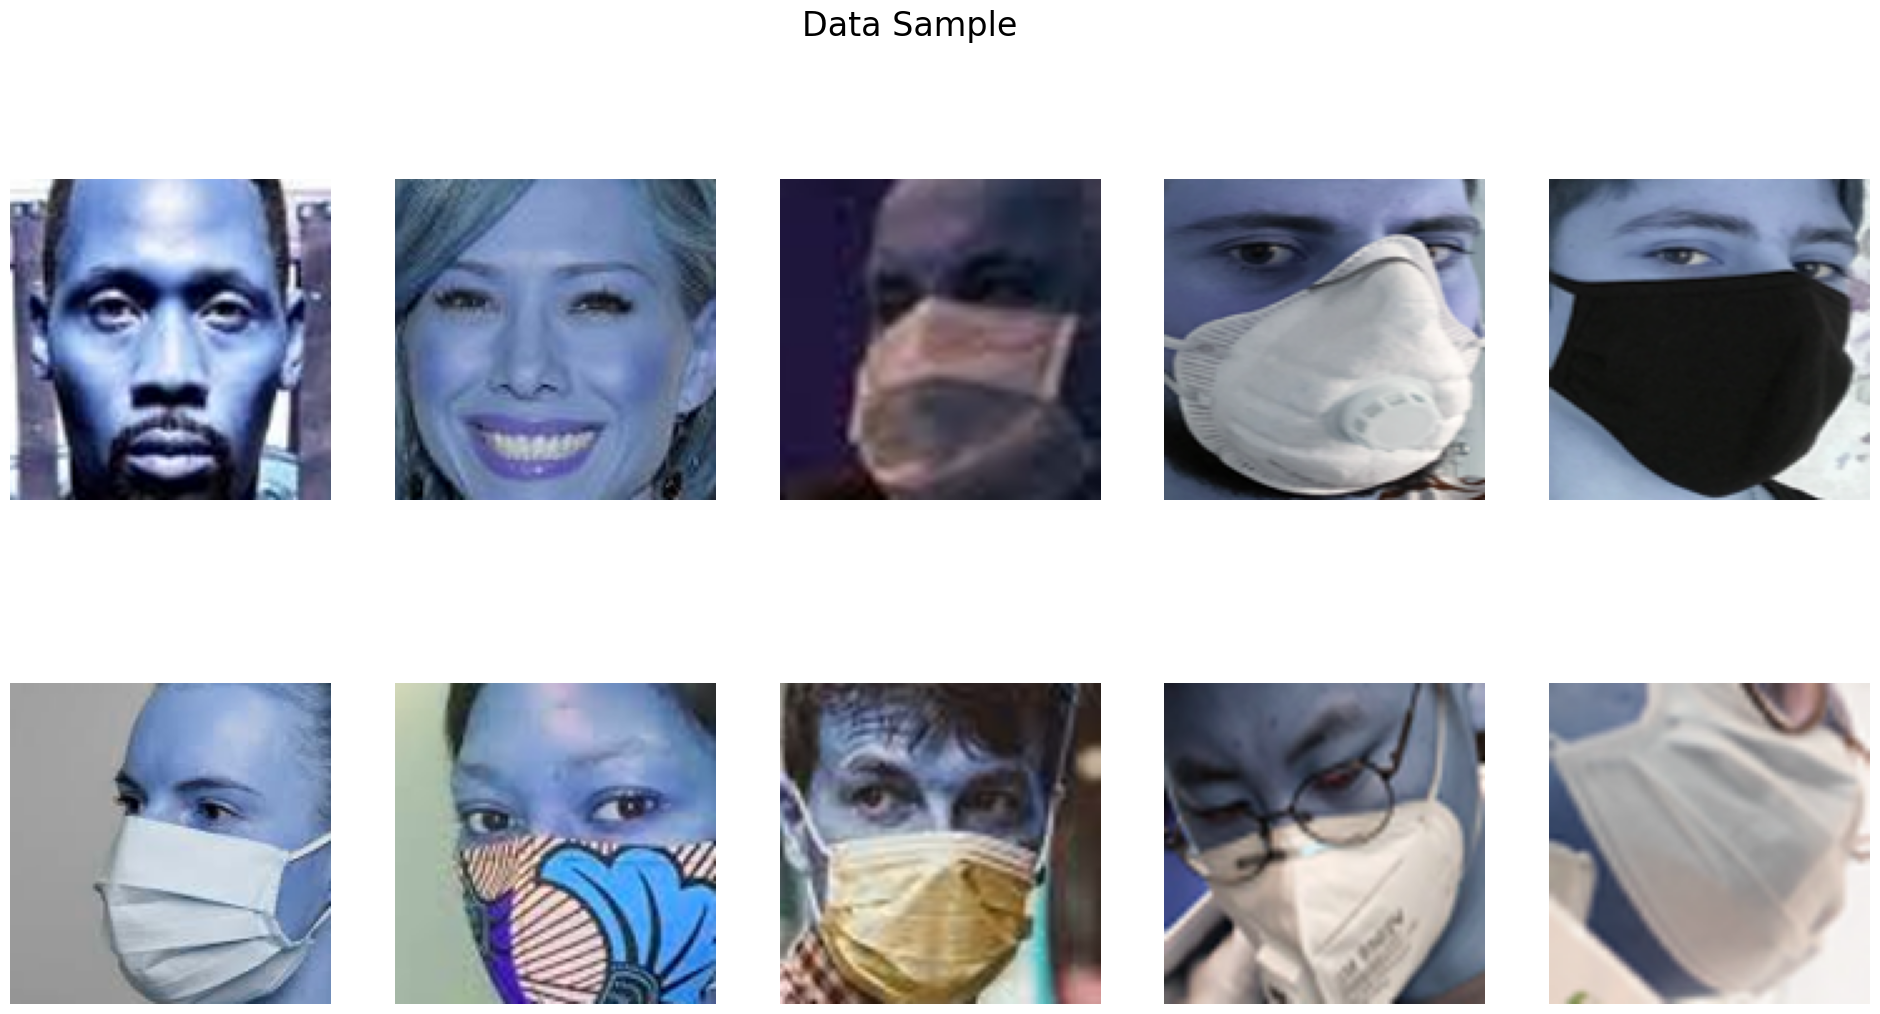

In [29]:
# Visualisasi Data Sample
fig, axs= plt.subplots(2,5, figsize=[24,12])


count=0
for i in range(2):    
    for j in range(5):  
        
        img = cv2.imread(train_path[count])
    
        axs[i][j].imshow(img)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("Data Sample", fontsize = 24)        
plt.show()

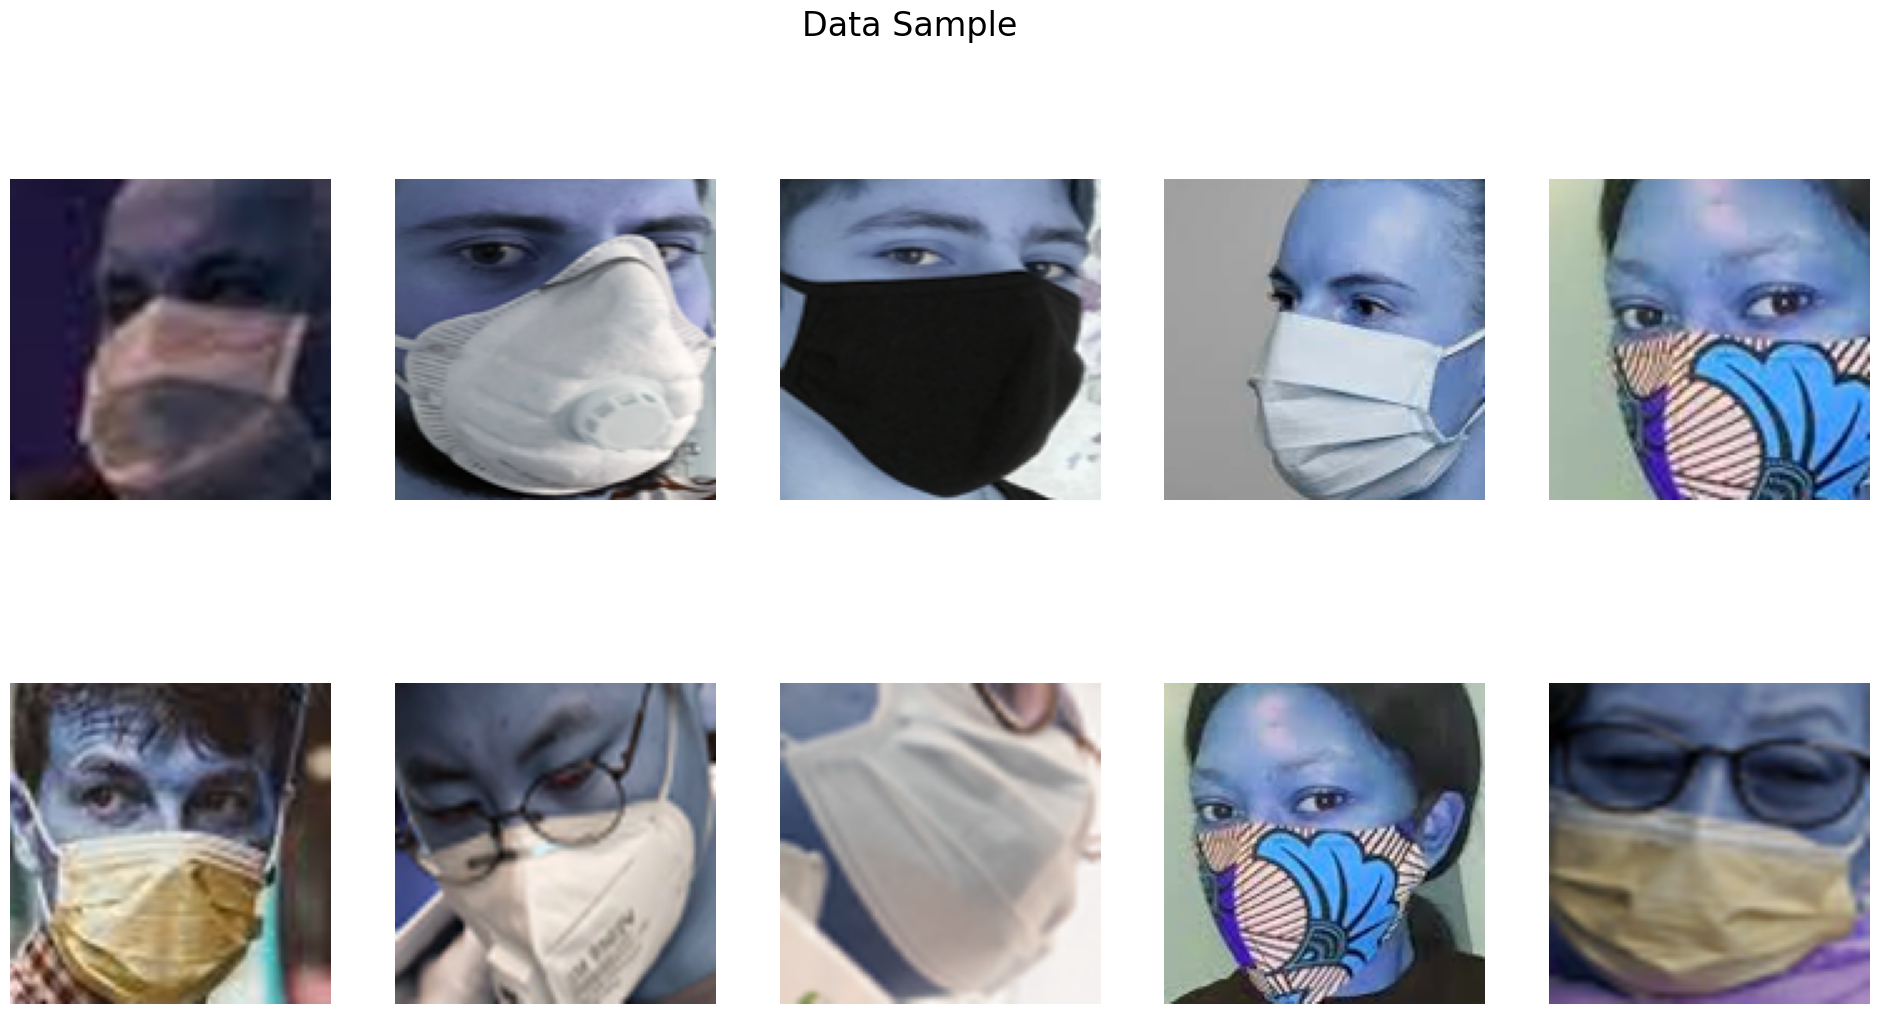

In [33]:
# Visualisasi Data Sample
fig, axs= plt.subplots(2,5, figsize=[24,12])


count=0
for i in range(2):    
    for j in range(5):  
        
        img = cv2.imread(test_path[count])
    
        axs[i][j].imshow(img)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("Data Sample", fontsize = 24)        
plt.show()